In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('pointTest.csv')
pList = df.values.tolist()
print(len(pList))

15


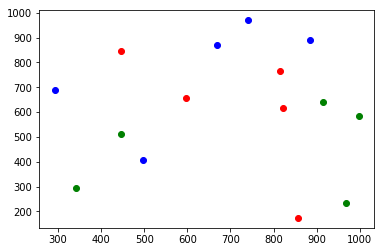

In [29]:
%matplotlib inline
point = np.zeros((len(pList),3))
i = 0
for row in pList:
    if row[1]=='hospital':
        plt.plot(row[2],row[3],'ro')
        point[i] = [1,row[2],row[3]]
    elif row[1]=='school':
        plt.plot(row[2],row[3],'bo')
        point[i] = [2,row[2],row[3]]
    elif row[1]=='shopping':
        plt.plot(row[2],row[3],'go')
        point[i] = [3,row[2],row[3]]
    i = i+1
#print(point)

In [37]:
# calculate the score of position (x,y)
def score(x,y,w):
    sum_score = 0
    for p in point:
        dist = np.sqrt(np.power(x-p[1],2)+np.power(y-p[2],2))
        # assessment on the distance
        score_i = 0
        if dist > 500:
            score_i = 1
        elif dist > 400:
            score_i = 2
        elif dist >300:
            score_i = 3
        elif dist > 200:
            score_i = 4
        elif dist > 100:
            score_i = 5
        else:
            score_i = 6
        # determine weights
        weight = w[int(p[0])-1]
        sum_score = sum_score + score_i*weight
    return sum_score

In [124]:
# calculate the cost (wieghted sum of distance)
def distCost(x,y,w):
    sum_cost = 0
    for p in point:
        dist = np.sqrt(np.power(x-p[1],2)+np.power(y-p[2],2))
        # determine weights
        # linear cost model
        weight = w[int(p[0])-1]
        cost_i = weight*dist
        sum_cost = sum_cost + cost_i
    return sum_cost

In [211]:
# coverage model
# if it is within the prior range "d"
def coverage(x,y,w,d):
    coverage_score = 0
    for p in point:
        dist = np.sqrt(np.power(x-p[1],2)+np.power(y-p[2],2))
        if dist < d:
            # add the weight of point type as the coverage score [1,0.5,1]
            # (shows the number of serviced hospitals/malls, added by 0.5 for each serviced school)
            coverage_score = coverage_score+w[int(p[0])-1]*2.5
    return coverage_score

In [212]:
# input weights
w = [0.4,0.2,0.4]
# input feasible points
LEN = 1000
RES = 10
DIS = 200
x = np.arange(0,LEN,RES)
y = np.arange(0,LEN,RES)
z = np.zeros((len(x),len(y)))
zc = np.zeros((len(x),len(y)))
zcv = np.zeros((len(x),len(y)))
zcvm = np.zeros((len(x),len(y)))

for i in np.arange(len(x)):
    for j in np.arange(len(y)):
        z[i][j] = score(x[i],y[j],w)
        zc[i][j] = distCost(x[i],y[j],w)
        zcv[i][j] = zcv[i][j]+coverage(x[i],y[j],w,DIS)
        for k in [100,200,300,400,500,1500]:
            zcvm[i][j] = zcvm[i][j]+coverage(x[i],y[j],w,k)

In [214]:
print(np.max(z))
index = np.unravel_index(np.argmax(z, axis=None), z.shape)
print('x=',x[index[0]])
print('y=',y[index[1]])
#print(z[73][59])
print(np.min(zc))
index = np.unravel_index(np.argmin(zc, axis=None), zc.shape)
print('x=',x[index[0]])
print('y=',y[index[1]])
print(np.max(zcv))
index = np.unravel_index(np.argmax(zcv, axis=None), zcv.shape)
print('x=',x[index[0]])
print('y=',y[index[1]])
print(np.max(zcvm))
index = np.unravel_index(np.argmax(zcvm, axis=None), zcvm.shape)
print('x=',x[index[0]])
print('y=',y[index[1]])

18.400000000000006
x= 730
y= 590
1515.1580412923315
x= 740
y= 620
5.0
x= 750
y= 750
46.0
x= 730
y= 590


Text(0.5,0.92,'Coverage Score Map (d<500)')

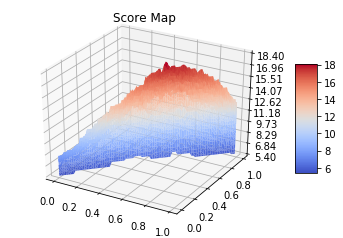

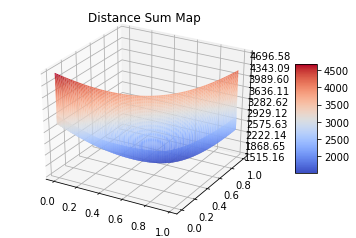

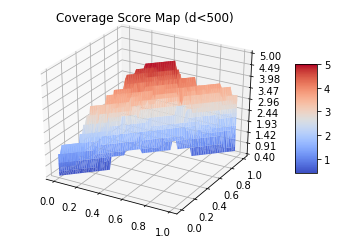

In [151]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x/1000, y/1000, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0.1, antialiased=True)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Score Map')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x/1000, y/1000, zc, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0.1, antialiased=True)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Distance Sum Map')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x/1000, y/1000, zcv, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0.1, antialiased=True)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Coverage Score Map (d<500)')

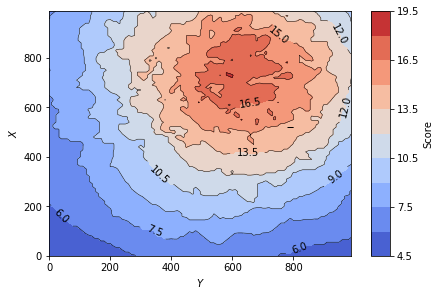

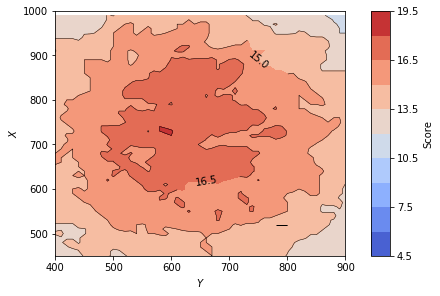

In [132]:
# score map
origin = 'lower'
fig1, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, z, 10, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')

fig2, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, z, 10, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig2.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')
plt.xlim(400,900)
plt.ylim(450,1000)

plt.show()


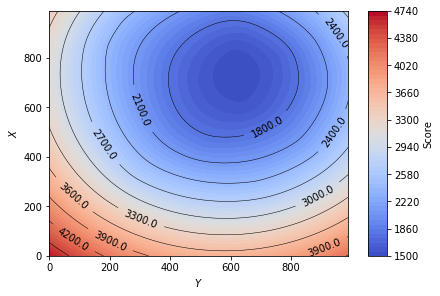

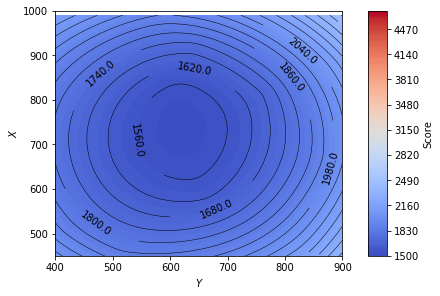

In [145]:
# cost map
origin = 'lower'
fig1, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zc, 60, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::5], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')

fig2, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zc, 120, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig2.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')
plt.xlim(400,900)
plt.ylim(450,1000)

plt.show()



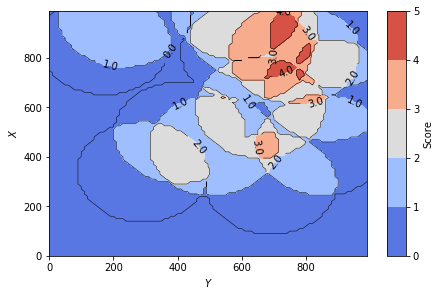

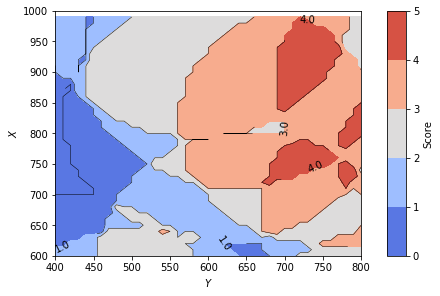

In [200]:
# coverage map (d=500)
origin = 'lower'
fig1, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zcv, 5, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')

fig2, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zcv, 5, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig2.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')
plt.xlim(400,800)
plt.ylim(600,1000)

plt.show()




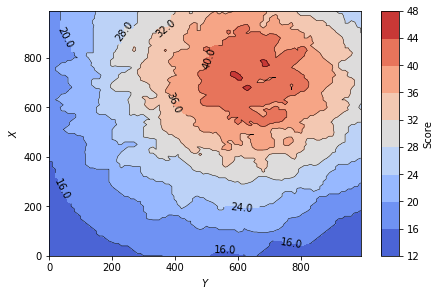

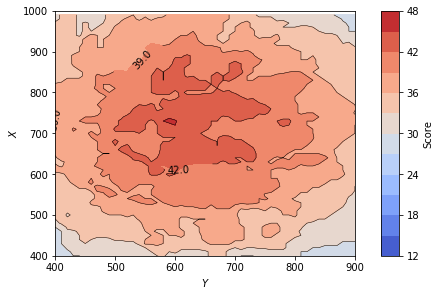

In [213]:
# coverage map (sum 100~500)
origin = 'lower'
fig1, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zcvm, 8, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')

fig2, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, zcvm, 10, cmap=plt.cm.coolwarm, origin=origin)
cbar = fig2.colorbar(CS)
cbar.ax.set_ylabel('Score')
CS2 = ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin=origin)
ax.clabel(CS2, fmt='%2.1f', colors='k', fontsize=10)
plt.ylabel('$X$')
plt.xlabel('$Y$')
plt.xlim(400,900)
plt.ylim(400,1000)

plt.show()

In [184]:
#score v.s. coverage (100,...,500,1500)
np.sqrt(np.mean((z-zcv)**2))

0.005656854249492335

In [181]:
#score v.s. coverage (100,...,500)
np.sqrt(np.mean((z-5-zcv)**2))

0.005656854249492373